In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans
# from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs

In [2]:
from pydataset import data

# import data
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
# rename columns

iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
# define independent variables for k-means

X = iris[['sepal_length', 'petal_length']]
X.head()

,sepal_length,petal_length
1,5.1,1.4
2,4.9,1.4
3,4.7,1.3
4,4.6,1.5
5,5.0,1.4


In [5]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [6]:
X_scaled.head()

,sepal_length,petal_length
1,-0.900681,-1.340227
2,-1.143017,-1.340227
3,-1.385353,-1.397064
4,-1.506521,-1.283389
5,-1.021849,-1.340227


In [7]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123, verbose = 0)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2], dtype=int32)

In [8]:
# make a new column names cluster in iris and X_scaled dataframe

iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

# Viz 1

In [22]:
np.array(iris.groupby(iris['cluster'])[['petal_length','sepal_length']].mean())

array([[5.56744186, 6.85813953],
       [1.5962963 , 5.00555556],
       [4.49245283, 5.87358491]])

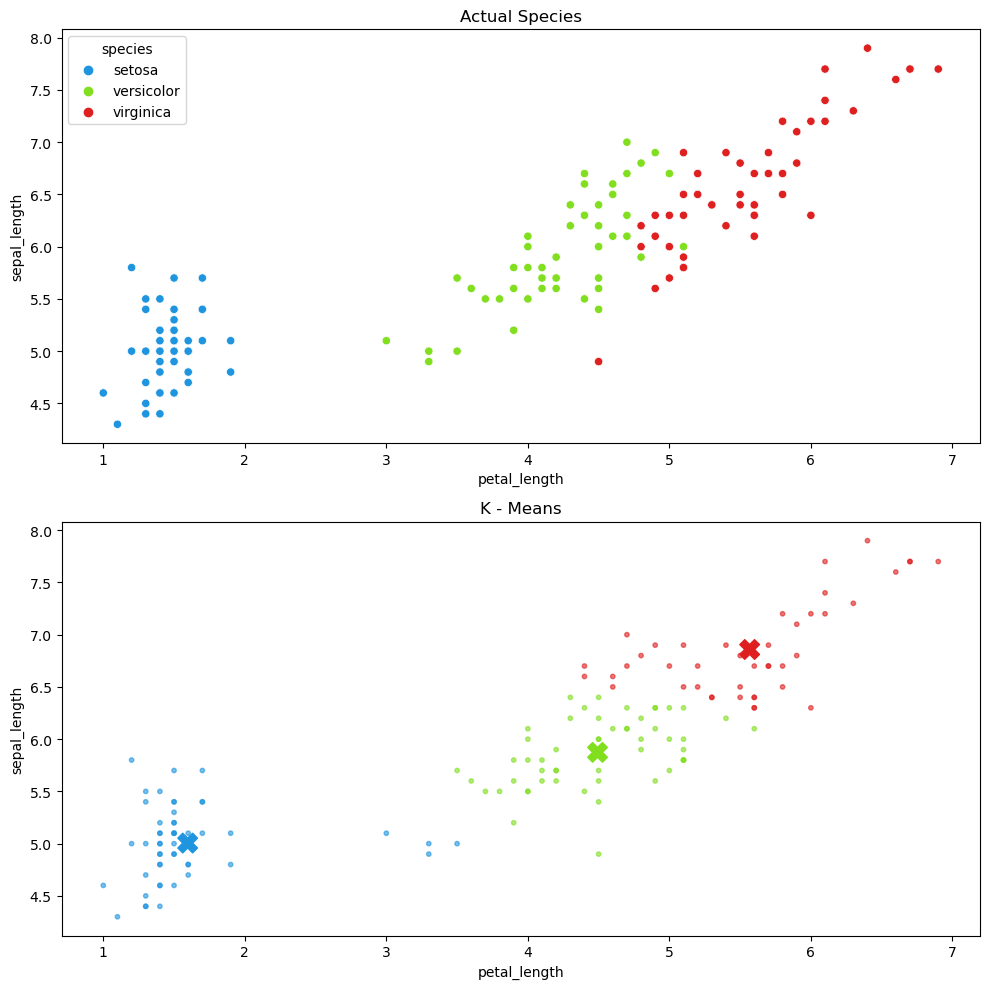

In [24]:
centroids = np.array(iris.groupby(iris['cluster'])[['petal_length','sepal_length']].mean())
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]
# cen_x = [i[0] for i in kmeans.cluster_centers_]
# cen_y = [i[1] for i in kmeans.cluster_centers_]
iris['cen_x'] = iris.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
iris['cen_y'] = iris.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

colors = ['#DF2020','#2095DF', '#81DF20' ]
iris['c'] = iris.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
#plot scatter chart for Actual species and those predicted by K - Means

#specify custom palette for sns scatterplot
colors1 = ['#2095DF','#81DF20' ,'#DF2020']
customPalette = sns.set_palette(sns.color_palette(colors1))

#plot the scatterplots

#Define figure (num of rows, columns and size)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

# plot ax1 
ax1 = plt.subplot(2,1,1) 
sns.scatterplot(data = iris, x = 'petal_length', y = 'sepal_length', ax = ax1, hue = 'species', palette=customPalette)
plt.title('Actual Species')

#plot ax2
ax2 = plt.subplot(2,1,2) 
ax2.scatter(iris.petal_length, iris.sepal_length, c=iris.c, alpha = 0.6, s=10)
ax2.set(xlabel = 'petal_length', ylabel = 'sepal_length', title = 'K - Means')

# plot centroids on  ax2
ax2.scatter(cen_x, cen_y, marker='X', c=colors, s=200)

iris.drop(columns = ['cen_x', 'cen_y', 'c'], inplace = True)
plt.tight_layout()
plt.show()

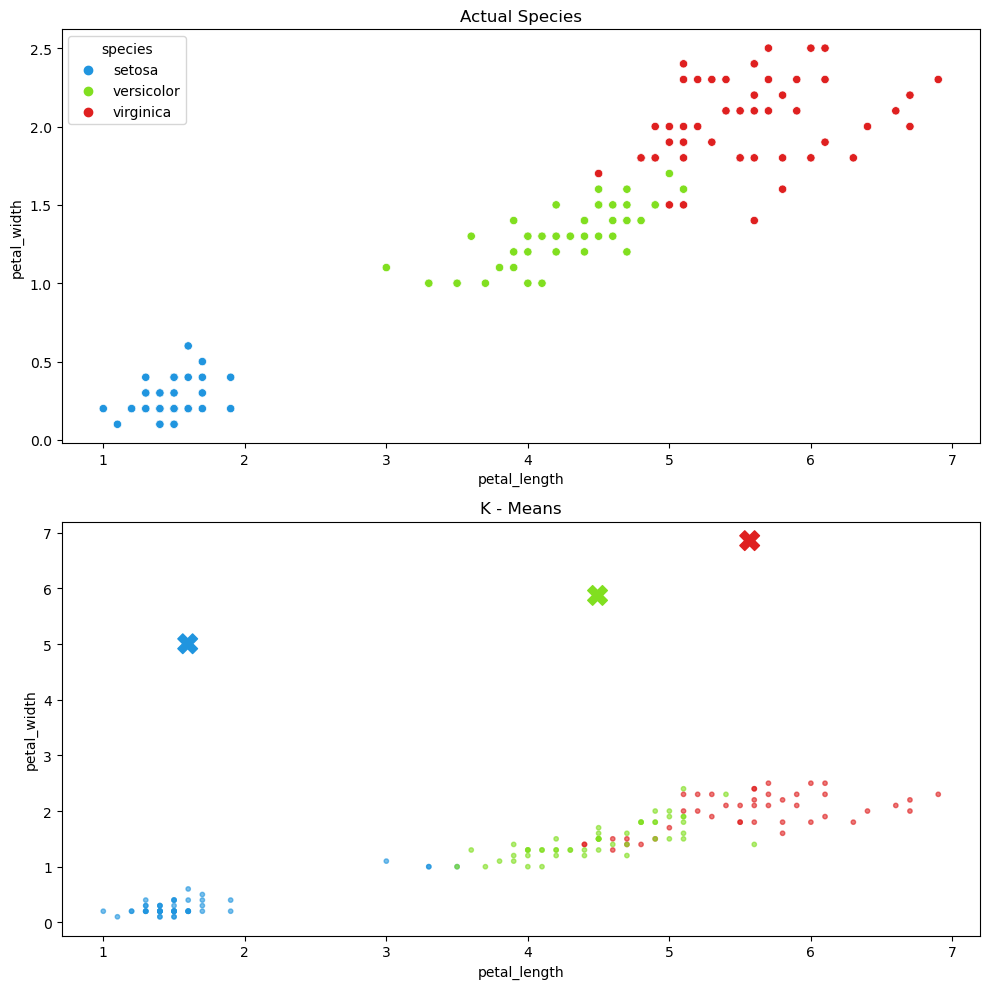

In [28]:
#     centroids = np.array(iris.groupby('cluster')['petal_length', 'petal_width'].mean())
centroids = np.array(iris.groupby(iris['cluster'])[['petal_length','sepal_length']].mean())
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]
# cen_x = [i[0] for i in kmeans.cluster_centers_]
# cen_y = [i[1] for i in kmeans.cluster_centers_]
iris['cen_x'] = iris.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
iris['cen_y'] = iris.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

colors = ['#DF2020','#2095DF', '#81DF20' ]
iris['c'] = iris.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
#plot scatter chart for Actual species and those predicted by K - Means

#specify custom palette for sns scatterplot
colors1 = ['#2095DF','#81DF20' ,'#DF2020']
customPalette = sns.set_palette(sns.color_palette(colors1))

#plot the scatterplots

#Define figure (num of rows, columns and size)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

# plot ax1 
ax1 = plt.subplot(2,1,1) 
sns.scatterplot(data = iris, x = 'petal_length', y = 'petal_width', ax = ax1, hue = 'species', palette=customPalette)
plt.title('Actual Species')

#plot ax2
ax2 = plt.subplot(2,1,2) 
ax2.scatter(iris.petal_length, iris.petal_width, c=iris.c, alpha = 0.6, s=10)
ax2.set(xlabel = 'petal_length', ylabel = 'petal_width', title = 'K - Means')

# plot centroids on  ax2
ax2.scatter(cen_x, cen_y, marker='X', c=colors, s=200)


iris.drop(columns = ['cen_x', 'cen_y', 'c'], inplace = True)
plt.tight_layout()
plt.show()

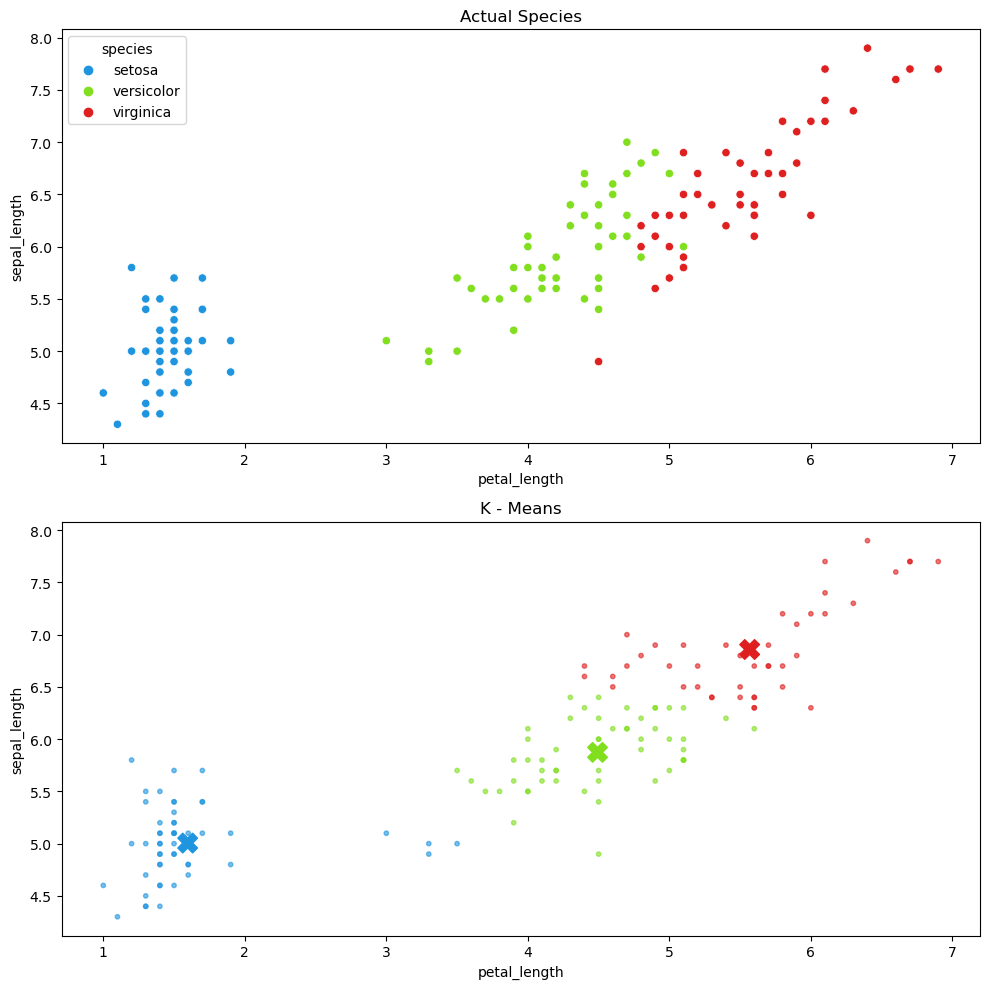

In [29]:
centroids = np.array(iris.groupby(iris['cluster'])[['petal_length', 'sepal_length']].mean())

cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]
# cen_x = [i[0] for i in kmeans.cluster_centers_]
# cen_y = [i[1] for i in kmeans.cluster_centers_]
iris['cen_x'] = iris.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
iris['cen_y'] = iris.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

colors = ['#DF2020','#2095DF', '#81DF20' ]
iris['c'] = iris.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
#plot scatter chart for Actual species and those predicted by K - Means

#specify custom palette for sns scatterplot
colors1 = ['#2095DF','#81DF20' ,'#DF2020']
customPalette = sns.set_palette(sns.color_palette(colors1))

#plot the scatterplots

#Define figure (num of rows, columns and size)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

# plot ax1 
ax1 = plt.subplot(2,1,1) 
sns.scatterplot(data = iris, x = 'petal_length', y = 'sepal_length', ax = ax1, hue = 'species', palette=customPalette)
plt.title('Actual Species')

#plot ax2
ax2 = plt.subplot(2,1,2) 
ax2.scatter(iris.petal_length, iris.sepal_length, c=iris.c, alpha = 0.6, s=10)
ax2.set(xlabel = 'petal_length', ylabel = 'sepal_length', title = 'K - Means')

# plot centroids on  ax2
ax2.scatter(cen_x, cen_y, marker='X', c=colors, s=200)


iris.drop(columns = ['cen_x', 'cen_y', 'c'], inplace = True)
plt.tight_layout()
plt.show()